In [6]:
!git clone https://github.com/city292/build_assessment.git

Cloning into 'build_assessment'...
remote: Enumerating objects: 13949, done.
remote: Total 13949 (delta 0), reused 0 (delta 0), pack-reused 13949
Receiving objects: 100% (13949/13949), 266.06 MiB | 40.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (13935/13935), done.


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model
import cv2


In [ ]:
# Set the path to your dataset folder
dataset_path = "/content/build_assessment/data/train"

# Set the image size you want to resize to
image_size = (64, 64)

In [ ]:
# Load and preprocess the dataset
X = []
y = []

In [ ]:
# Load images from the '0' folder (non-cancerous images)
folder_0 = os.path.join(dataset_path, '0')
for filename in os.listdir(folder_0):
    image_path = os.path.join(folder_0, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(0)

In [ ]:
# Load images from the '1' folder (non-cancerous images)
folder_1 = os.path.join(dataset_path, '1')
for filename in os.listdir(folder_1):
    image_path = os.path.join(folder_1, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(1)

In [ ]:
# Load images from the '2' folder (non-cancerous images)
folder_2 = os.path.join(dataset_path, '2')
for filename in os.listdir(folder_2):
    image_path = os.path.join(folder_2, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(2)

In [ ]:
# Load images from the '0' folder (non-cancerous images)
folder_3 = os.path.join(dataset_path, '3')
for filename in os.listdir(folder_3):
    image_path = os.path.join(folder_3, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(3)

In [ ]:
# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy

# # Load pre-trained VGG model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# # Freeze the layers in the base model
# for layer in base_model.layers:
#     layer.trainable = False

# # Modify the output layer
# x = Flatten()(base_model.output)
# output = Dense(4, activation='softmax')(x)  # 4 classes
# model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
261/261 [==============================] - 570s 2s/step - loss: 0.9128 - accuracy: 0.6039 - val_loss: 0.9920 - val_accuracy: 0.5626
Epoch 2/50
261/261 [==============================] - 560s 2s/step - loss: 0.8949 - accuracy: 0.6123 - val_loss: 0.9851 - val_accuracy: 0.5607
Epoch 3/50
261/261 [==============================] - 504s 2s/step - loss: 0.8770 - accuracy: 0.6233 - val_loss: 0.9842 - val_accuracy: 0.5578
Epoch 4/50
261/261 [==============================] - 547s 2s/step - loss: 0.8628 - accuracy: 0.6323 - val_loss: 0.9656 - val_accuracy: 0.5693
Epoch 5/50
261/261 [==============================] - 544s 2s/step - loss: 0.8523 - accuracy: 0.6345 - val_loss: 0.9701 - val_accuracy: 0.5683
Epoch 6/50
261/261 [==============================] - 545s 2s/step - loss: 0.8427 - accuracy: 0.6426 - val_loss: 0.9660 - val_accuracy: 0.5775
Epoch 7/50
261/261 [==============================] - 547s 2s/step - loss: 0.8345 - accuracy: 0.6417 - val_loss: 0.9646 - val_accuracy: 0.5679

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0138201713562012
Test accuracy: 0.6206235289573669


In [ ]:
model.save('/content/drive/MyDrive/CEG/Sem 8/K! Hacks 2024/damage_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
model=load_model('/content/drive/MyDrive/CEG/Sem 8/K! Hacks 2024/damage_model.h5')

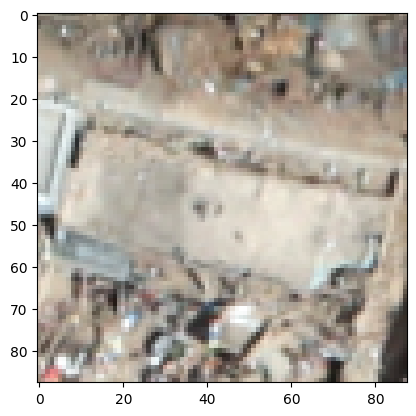

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
# reading the image
testImage = img.imread('/content/build_assessment/data/yushu/2/yushu_1010470.tif')
# displaying the image
plt.imshow(testImage)

In [ ]:
img = load_img('/content/build_assessment/data/yushu/2/yushu_1010470.tif',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 82ms/step


'2'

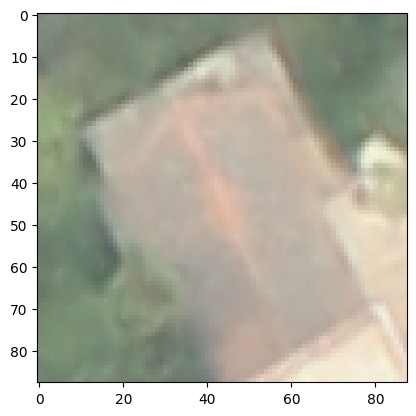

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as img
# reading the image
testImage = img.imread('/content/build_assessment/data/train/0/builds_12061582.tif')
# displaying the image
plt.imshow(testImage)

In [19]:
img = load_img('/content/build_assessment/data/train/0/builds_12061582.tif',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 19ms/step


0

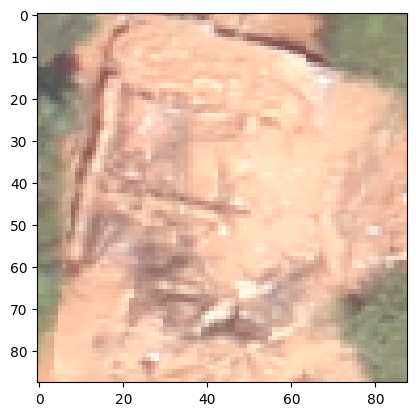

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img
# reading the image
testImage = img.imread('/content/build_assessment/data/train/3/builds_105316.tif')
# displaying the image
plt.imshow(testImage)

In [9]:
img = load_img('/content/build_assessment/data/train/3/builds_105316.tif',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 27ms/step


'3'